In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Image Processing

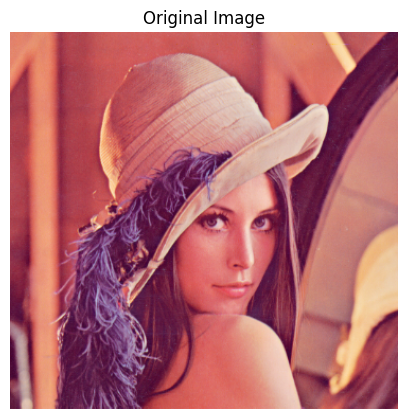

In [10]:
# 1. Read and Display Image
image = Image.open("/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week1/lenna_image.png")
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [11]:
# Convert to NumPy array
img_array = np.array(image)

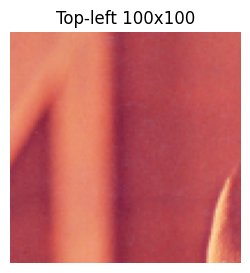

In [12]:
# 2. Display Top-left 100x100 pixels
top_left = img_array[:100, :100]
plt.figure(figsize=(3, 3))
plt.imshow(top_left)
plt.title("Top-left 100x100")
plt.axis("off")
plt.show()

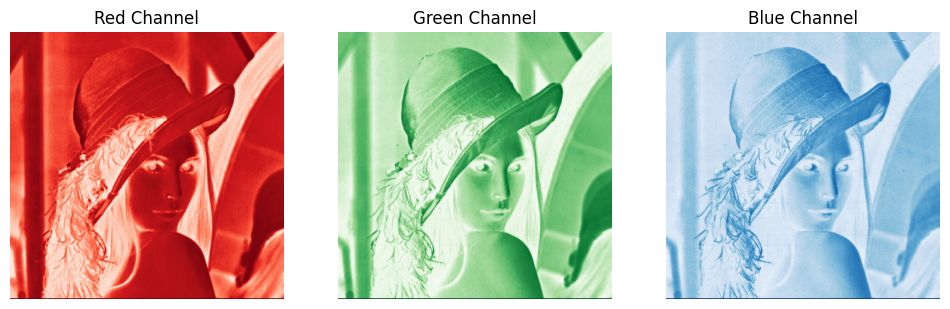

In [15]:
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

plt.figure(figsize=(12, 4))
for i, (channel, cmap, title) in enumerate(zip([red_channel, green_channel, blue_channel],
                                               ["Reds", "Greens", "Blues"],
                                               ["Red Channel", "Green Channel", "Blue Channel"])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap=cmap)
    plt.title(title)
    plt.axis("off")
plt.show()

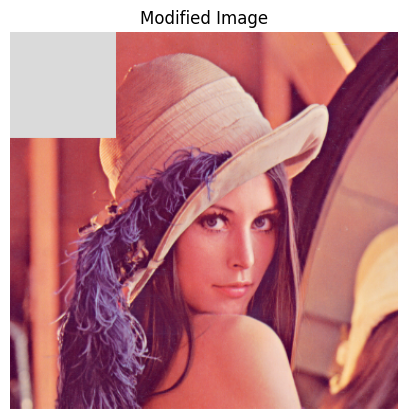

In [17]:
# 4. Modify top-left 100x100 pixels to 210 (light gray)
img_modified = img_array.copy()
img_modified[:100, :100] = 210
plt.figure(figsize=(5, 5))
plt.imshow(img_modified)
plt.title("Modified Image")
plt.axis("off")
plt.show()

# Exercise 2: Grayscale Processing

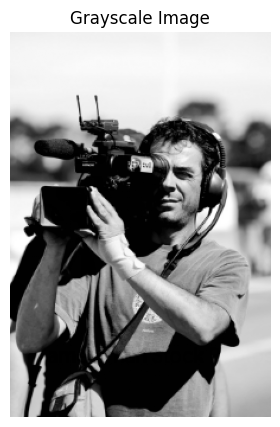

In [20]:
# 1. Load and display grayscale image
gray_image = Image.open("/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week1/camera_man.jpg").convert('L')
plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [25]:
# Convert image to NumPy array
gray_array = np.array(gray_image)
height, width = gray_array.shape

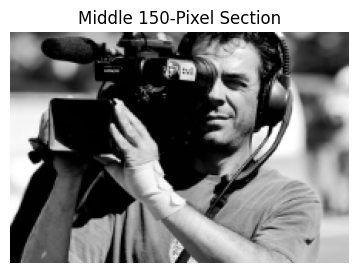

In [26]:
# 2. Extract middle 150 pixels
middle_section = gray_array[height//2 - 75:height//2 + 75, :]
plt.figure(figsize=(6, 3))
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

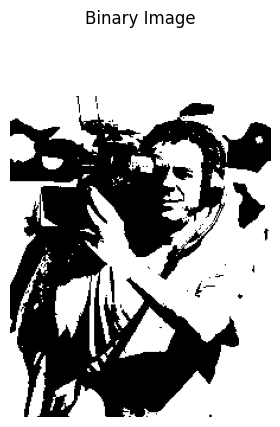

In [28]:
# 3. Apply threshold (binary image)
binary_image = np.where(gray_array < 100, 0, 255)
plt.figure(figsize=(5, 5))
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

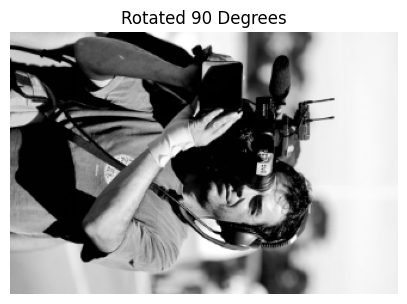

In [29]:
# 4. Rotate image 90 degrees clockwise
rotated_image = np.rot90(gray_array, k=-1)
plt.figure(figsize=(5, 5))
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated 90 Degrees")
plt.axis("off")
plt.show()

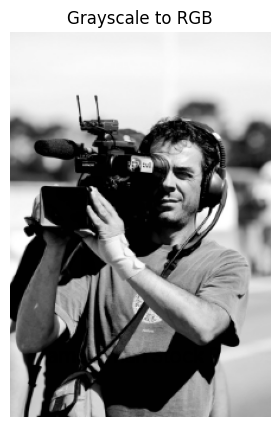

In [30]:
# 5. Convert grayscale to RGB
rgb_image = np.stack([gray_array]*3, axis=-1)
plt.figure(figsize=(5, 5))
plt.imshow(rgb_image)
plt.title("Grayscale to RGB")
plt.axis("off")
plt.show()

# Exercise 3: Image Compression using PCA

In [31]:
# Load and convert image to grayscale
image = Image.open("/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week1/lenna_image.png").convert('L')
img_array = np.array(image, dtype=np.float32)

In [32]:
# Centering (Standardization)
mean = np.mean(img_array, axis=0)
standardized_data = img_array - mean

In [33]:
# Compute Covariance Matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

In [34]:
# Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

In [35]:
# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]

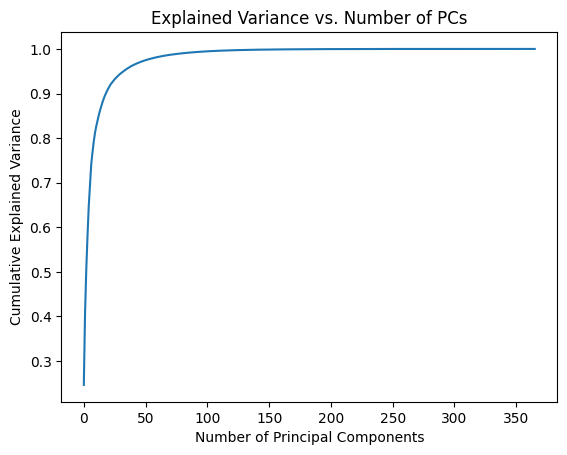

In [36]:
# Show cumulative variance
explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of PCs")
plt.show()

In [42]:
# Compression and Reconstruction for different k values
def reconstruct_image(k):
    top_k_eigenvectors = eigenvectors[:, :k]
    reduced_data = np.dot(standardized_data, top_k_eigenvectors)
    reconstructed_data = np.dot(reduced_data, top_k_eigenvectors.T) + mean
    return np.clip(reconstructed_data, 0, 255)

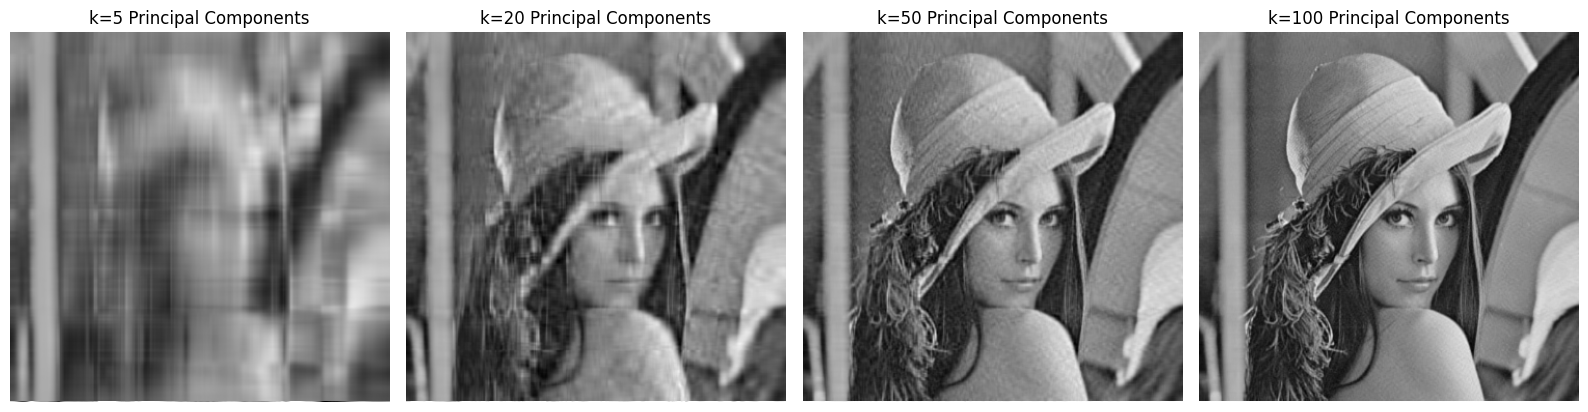

In [44]:
# Experimenting with different principle components
plt.figure(figsize=(16, 4))
k_values = [5, 20, 50, 100]

for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(k)

    # Ensure real-valued data and clip to valid range
    reconstructed = np.real(reconstructed)
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)

    plt.subplot(1, 4, i + 1)
    plt.imshow(reconstructed, cmap="gray")
    plt.title(f"k={k} Principal Components")
    plt.axis("off")

plt.tight_layout()
plt.show()